<a href="https://colab.research.google.com/github/asamiei/HER2/blob/main/HER2_cell_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten



In [3]:
image_size = 64

strong (396, 64, 64, 3)
medium (375, 64, 64, 3)
weak (291, 64, 64, 3)
negative (245, 64, 64, 3)


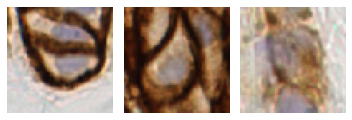

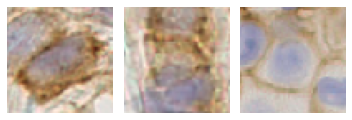

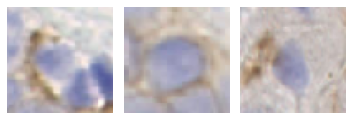

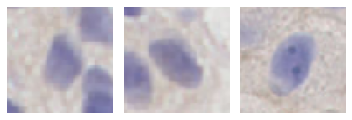

In [4]:

HER2_Strong = glob.glob("/content/drive/MyDrive/Her2_cell_dataset/HER2_Strong/*")

# Combining all the images into one numpy array
HER2_Strong_dataset = [cv2.resize(cv2.imread(fname), (image_size,image_size)) for fname in HER2_Strong]
HER2_Strong_dataset = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in HER2_Strong_dataset])
print('strong', np.shape(HER2_Strong_dataset))

# Display random images from the dataset
fig, axes = plt.subplots(1, 3, figsize=(5,5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(HER2_Strong_dataset[0])
ax[1].imshow(HER2_Strong_dataset[10])
ax[2].imshow(HER2_Strong_dataset[-1])

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

#####################
HER2_Medium = glob.glob("/content/drive/MyDrive/Her2_cell_dataset/Her2_Medium/*")

# Combining all the images into one numpy array
HER2_Medium_dataset = [cv2.resize(cv2.imread(fname), (image_size,image_size)) for fname in HER2_Medium]
HER2_Medium_dataset = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in HER2_Medium_dataset])
print('medium', np.shape(HER2_Medium_dataset))


# Display random images from the dataset
fig, axes = plt.subplots(1, 3, figsize=(5,5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(HER2_Medium_dataset[0])
ax[1].imshow(HER2_Medium_dataset[10])
ax[2].imshow(HER2_Medium_dataset[-1])

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()



#####################
HER2_Weak = glob.glob("/content/drive/MyDrive/Her2_cell_dataset/Her2_Weak/*")

# Combining all the images into one numpy array
HER2_Weak_dataset = [cv2.resize(cv2.imread(fname), (image_size,image_size)) for fname in HER2_Weak]
HER2_Weak_dataset = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in HER2_Weak_dataset])
print('weak', np.shape(HER2_Weak_dataset))

# Display random images from the dataset
fig, axes = plt.subplots(1, 3, figsize=(5,5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(HER2_Weak_dataset[0])
ax[1].imshow(HER2_Weak_dataset[10])
ax[2].imshow(HER2_Weak_dataset[-1])

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()





#####################
HER2_Negative = glob.glob("/content/drive/MyDrive/Her2_cell_dataset/Her2_Negative/*")

# Combining all the images into one numpy array
HER2_Negative_dataset = [cv2.resize(cv2.imread(fname), (image_size,image_size)) for fname in HER2_Negative]
HER2_Negative_dataset = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2RGB) for image in HER2_Negative_dataset])
print('negative', np.shape(HER2_Negative_dataset))

# Display random images from the dataset
fig, axes = plt.subplots(1, 3, figsize=(5,5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(HER2_Negative_dataset[0])
ax[1].imshow(HER2_Negative_dataset[10])
ax[2].imshow(HER2_Negative_dataset[-1])

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()




In [5]:
# Combining image datasets
combined_image_dataset = np.concatenate((HER2_Negative_dataset, HER2_Weak_dataset, HER2_Medium_dataset, HER2_Strong_dataset), axis = 0)

In [6]:
print(np.shape(combined_image_dataset))

(1307, 64, 64, 3)


In [7]:
# Assigning a label to each image
    # 0 = Negative
    # 1 = Weak
    # 2 = Medium
    # 3 = Strong


Negative_label = np.zeros(np.size(HER2_Negative_dataset, axis = 0))
Weak_label = np.ones(np.size(HER2_Weak_dataset, axis = 0))
Medium_label = 2 * (np.ones(np.size(HER2_Medium_dataset, axis = 0)))
Strong_label = 3 * (np.ones(np.size(HER2_Strong_dataset, axis = 0)))

combined_label_dataset_ = np.concatenate((Negative_label, Weak_label, Medium_label, Strong_label), axis = 0)


In [8]:
# Must transform np array into list to feed into to_categorical
combined_label_dataset = np.ndarray.tolist(combined_label_dataset_)

from keras.utils.np_utils import to_categorical
combined_label_dataset = to_categorical(combined_label_dataset, num_classes = 4, dtype='float32')

In [9]:
print(combined_label_dataset)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(combined_image_dataset, combined_label_dataset, test_size=0.25, random_state=42)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

######### Data augmentation

train_datagen = ImageDataGenerator(rotation_range=45,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    height_shift_range = 0.1,
    width_shift_range = 0.1)


train_datagen.fit(X_train)

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 32)


Epoch 1/200
16/16 [==============================] - 5s 77ms/step - loss: 0.4997 - accuracy: 0.8066 - val_loss: 142.5814 - val_accuracy: 0.2936
Epoch 2/200
16/16 [==============================] - 1s 53ms/step - loss: 0.3583 - accuracy: 0.8660 - val_loss: 29.4117 - val_accuracy: 0.2936
Epoch 3/200
16/16 [==============================] - 1s 47ms/step - loss: 0.2657 - accuracy: 0.8750 - val_loss: 6.2942 - val_accuracy: 0.4648
Epoch 4/200
16/16 [==============================] - 1s 49ms/step - loss: 0.3443 - accuracy: 0.8672 - val_loss: 3.6971 - val_accuracy: 0.5046
Epoch 5/200
16/16 [==============================] - 1s 49ms/step - loss: 0.2879 - accuracy: 0.8789 - val_loss: 1.3279 - val_accuracy: 0.6147
Epoch 6/200
16/16 [==============================] - 1s 48ms/step - loss: 0.2703 - accuracy: 0.9020 - val_loss: 2.2984 - val_accuracy: 0.5902
Epoch 7/200
16/16 [==============================] - 1s 48ms/step - loss: 0.2513 - accuracy: 0.8900 - val_loss: 1.6461 - val_accuracy: 0.6239
Epo

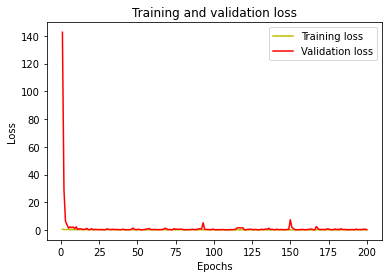

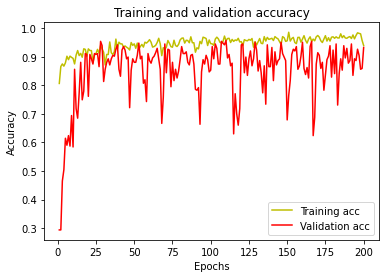

In [12]:
#VGG model with 3 blocks + dropout + batch normalization
activation = 'sigmoid'

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(image_size, image_size, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))

# compile model

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


##################################################################

#NOTE: When we use fit_generator, the number of samples processed 
#for each epoch is batch_size * steps_per_epochs. 
#should typically be equal to the number of unique samples in our 
#dataset divided by the batch size.
#For now let us set it to 500 




history = model.fit(
        train_generator,
        steps_per_epoch = 16,
        epochs = 200,
        validation_data = (X_test, y_test),
        shuffle = True
)




#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



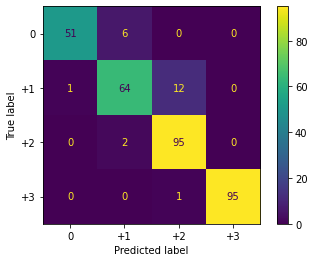

precision: [0.981  0.8887 0.8794 1.    ]
recall: [0.8945 0.831  0.9795 0.9897]
fscore: [0.9355 0.859  0.927  0.9946]
support: [57. 77. 97. 96.]


In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_ = []
y_test_ = []

for i in range(np.shape(X_test)[0]):
    y_pred_ = np.append(y_pred_, np.argmax(model.predict(np.expand_dims(X_test[i], axis = 0))))

y_pred_ = y_pred_.astype(np.int16)


for i in range(np.shape(X_test)[0]):
    y_test_ = np.append(y_test_, np.argmax(y_test[i]))

y_test_ = y_test_ .astype(np.int16)


cm=confusion_matrix(y_test_, y_pred_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['0','+1', '+2', '+3'])
disp.plot()
plt.show()


from sklearn.metrics import precision_recall_fscore_support as score


precision, recall, fscore, support = score(y_test_, y_pred_)

print('precision: {}'.format(precision.astype(np.float16)))
print('recall: {}'.format(recall.astype(np.float16)))
print('fscore: {}'.format(fscore.astype(np.float16)))
print('support: {}'.format(support.astype(np.float16)))
